In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

In [ ]:
## About the Dataset

# The dataset contains several parameters which are considered important during the application for Masters Programs.
# The parameters included are :

# GRE Scores ( out of 340 )
# TOEFL Scores ( out of 120 )
# University Rating ( out of 5 )
# Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
# Undergraduate GPA ( out of 10 )
# Research Experience ( either 0 or 1 )
# Chance of Admit ( ranging from 0 to 1 )

In [4]:
df = pd.read_csv('/content/Admission_Predict_Ver1.1.csv')

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.shape

(500, 9)

In [7]:
# Checking for Missing Value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
## No Missing Values

In [10]:
## Checking for Duplicate Value

df.duplicated().sum()

0

In [11]:
## No Duplicate

In [13]:
## Serial No. Column not request so we will remove it
## Chance of Admit we will make it our output
## We will use Min_Max_Scaler for Feature Scaling coz we knows the Max and Min value, Like GRE cannot be more than 340
## TOEFL Score cannot be more than 120 so we will us min max scaler for that

In [14]:
## Removing Serial#

df = df.iloc[:, 1:]
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [15]:
## Spliting the data into train and test

x = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test ,y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=1)

x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [21]:
from sklearn.preprocessing import MinMaxScaler
m = MinMaxScaler()
x_train_sc= m.fit_transform(x_train)
x_test_sc = m.transform(x_test)

In [23]:
x_train_sc

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [24]:
## Building ANN Model

model = Sequential()
model.add(Dense(7,activation='relu', input_dim=7))
model.add(Dense(1,activation = 'linear'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
Total params: 64 (256.00 Byte)
Trainable params: 64 (256.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.compile(loss='mean_squared_error', optimizer= 'adam')

In [29]:
history = model.fit(x_train_sc, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
10/10 [==============================] - 5s 21ms/step - loss: 0.0601 - val_loss: 0.0568
Epoch 2/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0545 - val_loss: 0.0519
Epoch 3/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0499 - val_loss: 0.0476
Epoch 4/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0460 - val_loss: 0.0440
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0423 - val_loss: 0.0407
Epoch 6/10
10/10 [==============================] - 0s 7ms/step - loss: 0.0393 - val_loss: 0.0377
Epoch 7/10
10/10 [==============================] - 0s 7ms/step - loss: 0.0365 - val_loss: 0.0352
Epoch 8/10
10/10 [==============================] - 0s 7ms/step - loss: 0.0340 - val_loss: 0.0329
Epoch 9/10
10/10 [==============================] - 0s 7ms/step - loss: 0.0319 - val_loss: 0.0309
Epoch 10/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0299 - val_loss: 0.0290


In [30]:
y_pred = model.predict(x_test_sc)

4/4 [==============================] - 0s 2ms/step


In [31]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.16909629918076807

In [32]:
## Performance is not upto the mark
## Lets improve out model by adding hidden layer and increasing the no. of epochs

In [36]:
model1 = Sequential()
model1.add(Dense(7,activation='relu', input_dim=7))
model1.add(Dense(7,activation='relu'))
model1.add(Dense(1,activation = 'linear'))
model1.compile(loss='mean_squared_error', optimizer= 'adam')

In [37]:
history1 = model1.fit(x_train_sc, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 19ms/step - loss: 1.2000 - val_loss: 1.1393
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.9630 - val_loss: 0.9097
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.7688 - val_loss: 0.7127
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5920 - val_loss: 0.5261
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4287 - val_loss: 0.3577
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2852 - val_loss: 0.2259
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1782 - val_loss: 0.1353
Epoch 8/100
10/10 [==============================] - 0s 7ms/step - loss: 0.1048 - val_loss: 0.0756
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0581 - val_loss: 0.0397
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0318 - val_loss: 0.0212
Epoch 11

In [38]:
y_pred1 = model1.predict(x_test_sc)
r2_score(y_test,y_pred1)

4/4 [==============================] - 0s 2ms/step


0.7459035351565969

In [39]:
# R2 Score Impoved

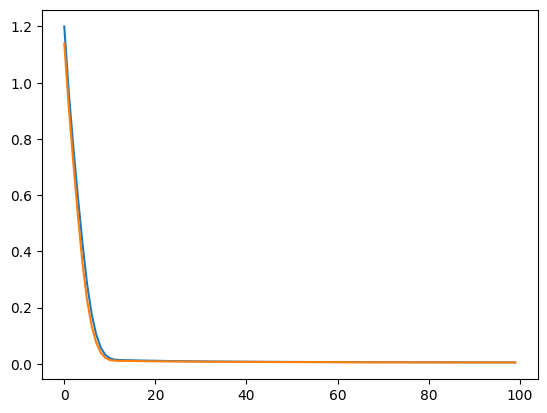

In [40]:
## Ploting


plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [ ]:
## Training has been Done very imprvinentily.